In [4]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\71591\Desktop\dataset\Anaemia Prediction.csv"
Anaemia = pd.read_csv(file_path)

# Replace categorical values with numbers
Anaemia['Sex'] = Anaemia['Sex'].apply(lambda x: 1 if x == 'F' else 0)
Anaemia['Anaemic'] = Anaemia['Anaemic'].apply(lambda x: 1 if x == 'Yes' else 0)

# Display the updated DataFrame
Anaemia


,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,0,43.2555,30.8421,25.9025,6.3,1
1,2,1,45.6033,28.1900,26.2067,13.5,0
2,3,0,45.0107,28.9677,26.0215,11.7,0
3,4,1,44.5398,28.9899,26.4703,13.5,0
4,5,0,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...,...,...
99,100,0,49.9999,29.2860,20.7141,14.5,1
100,101,0,42.2324,30.6757,27.0919,6.3,1
101,102,1,45.6064,31.9084,22.4852,12.7,0
102,103,0,45.2095,29.2769,25.5136,13.4,0


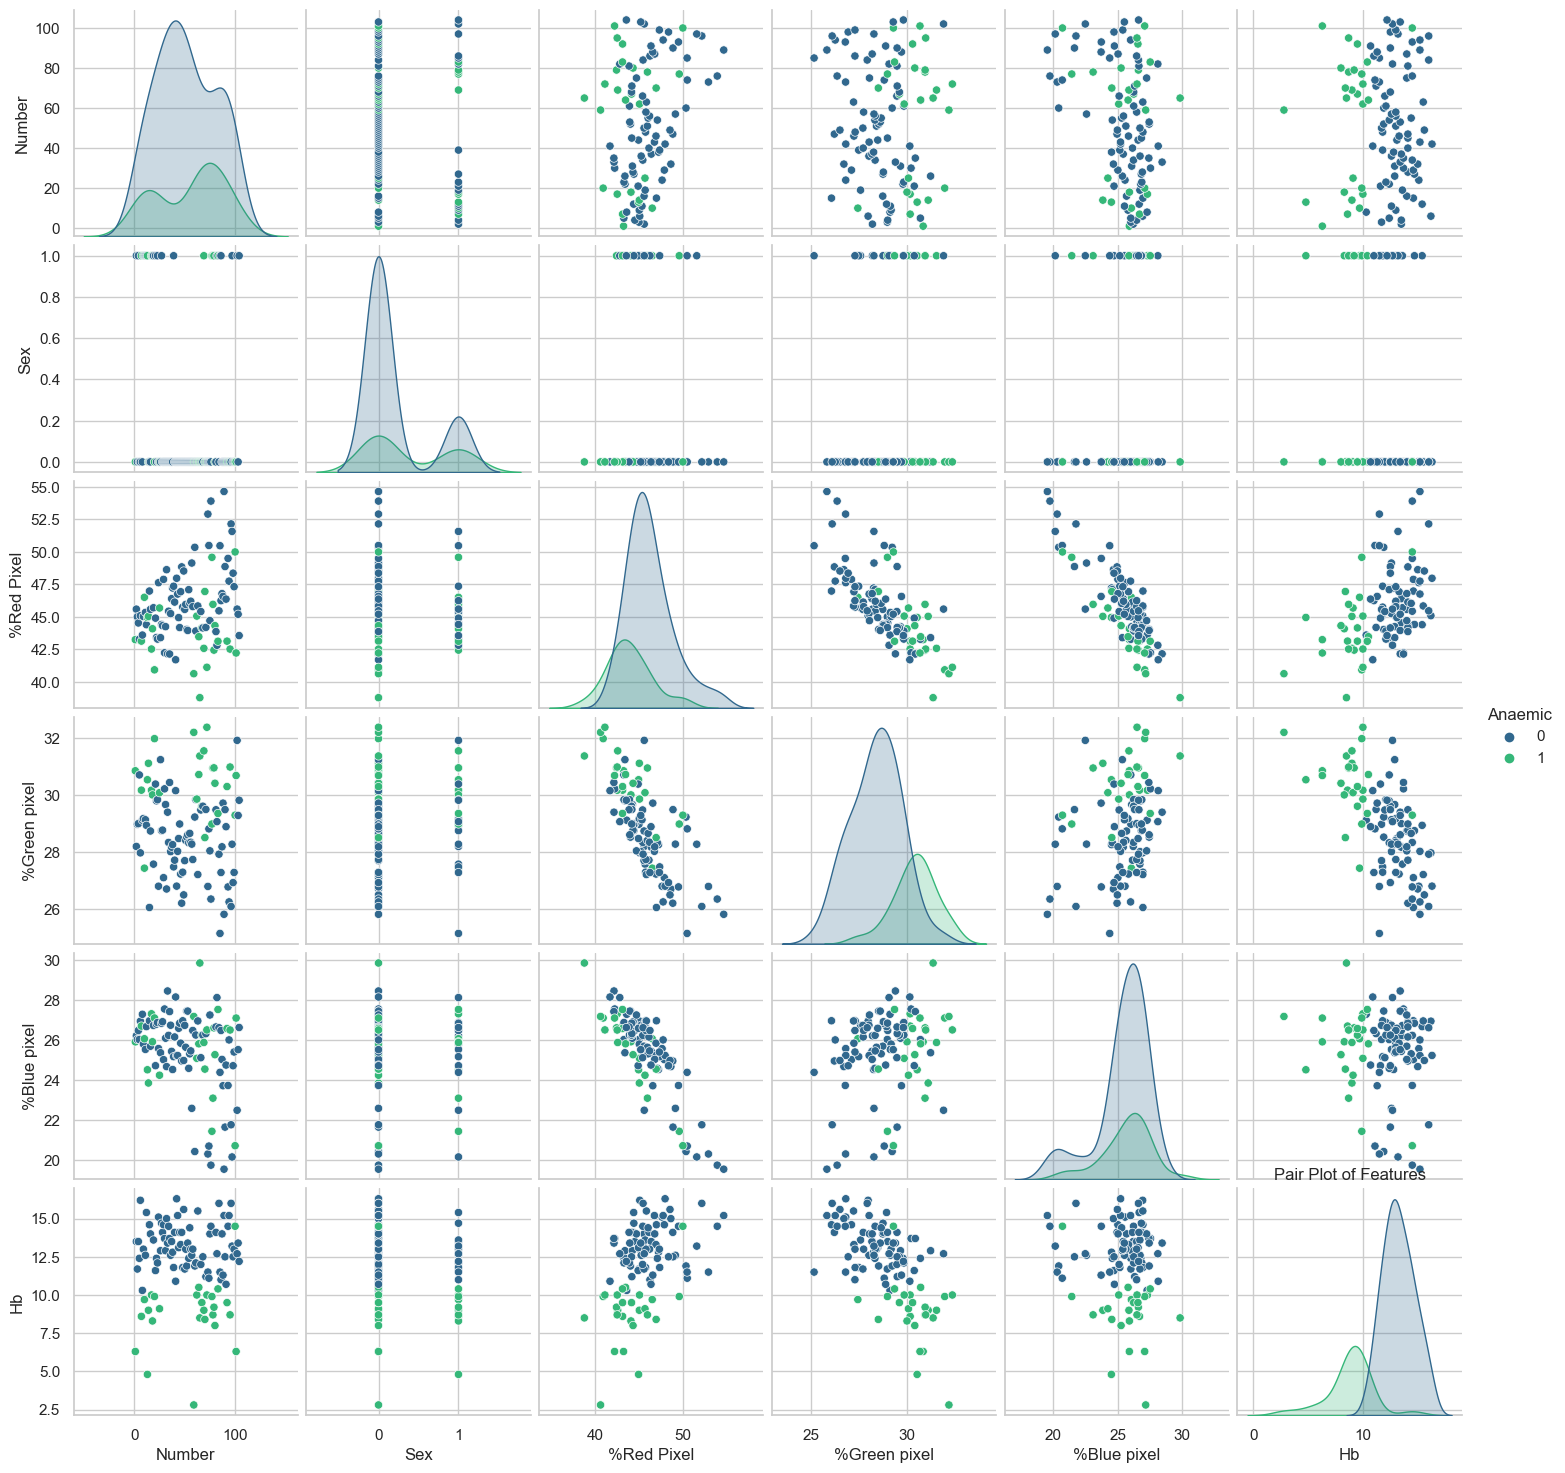

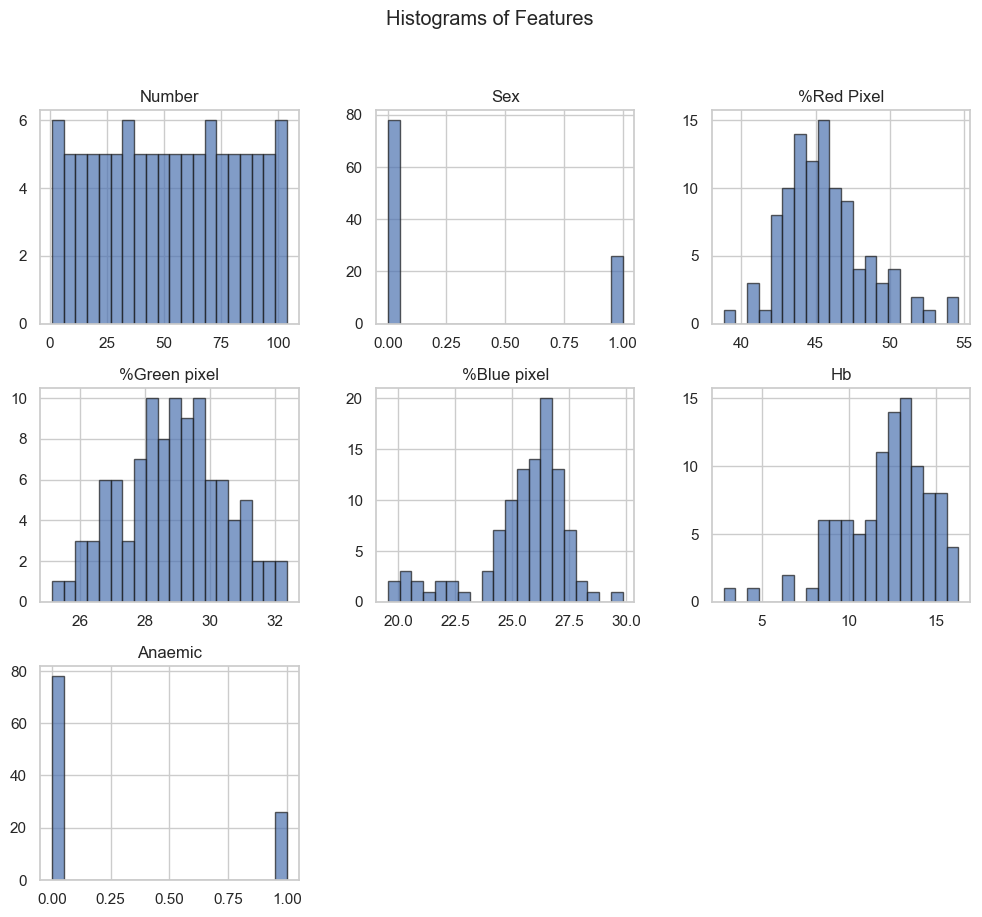

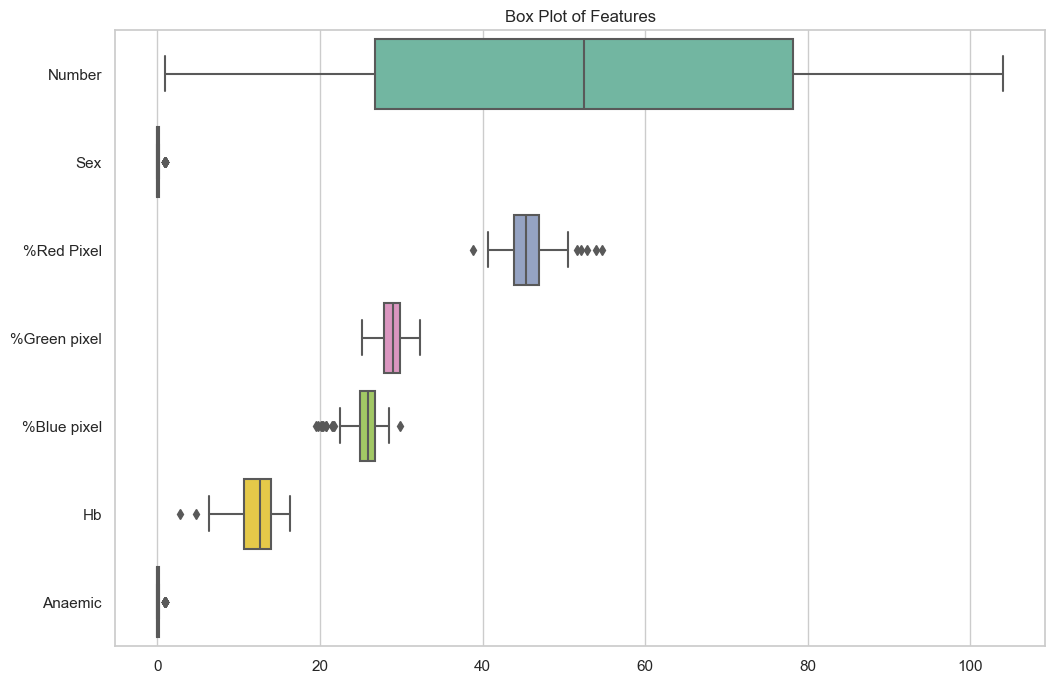

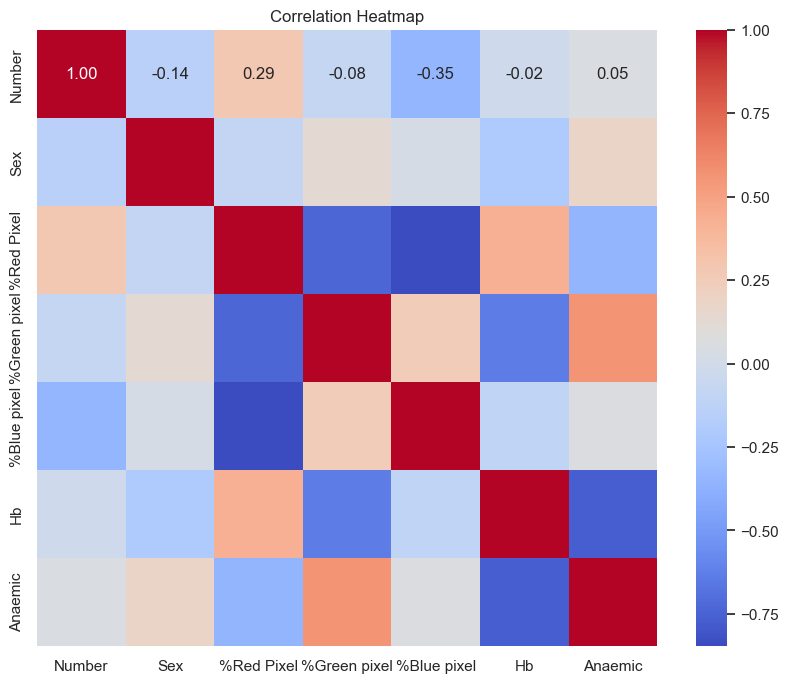

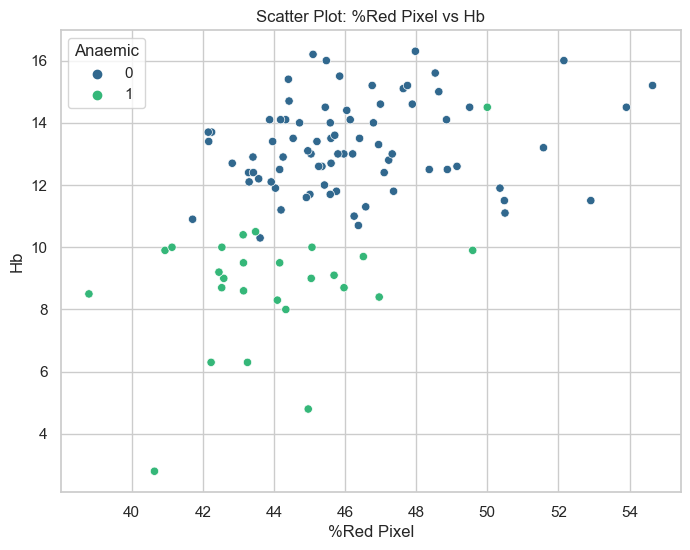

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the style for the plots
sns.set(style="whitegrid")

# Pair Plot
sns.pairplot(Anaemia, hue="Anaemic", palette="viridis")
plt.title('Pair Plot of Features')
plt.show()

# Histograms
Anaemia.hist(figsize=(12, 10), bins=20, edgecolor='k', alpha=0.7)
plt.suptitle('Histograms of Features')
plt.show()

# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=Anaemia, orient="h", palette="Set2")
plt.title('Box Plot of Features')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = Anaemia.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Scatter Plot (example: %Red Pixel vs Hb)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Anaemia, x='%Red Pixel', y='Hb', hue='Anaemic', palette="viridis")
plt.title('Scatter Plot: %Red Pixel vs Hb')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = Anaemia.drop("Anaemic", axis=1)
y = Anaemia['Anaemic']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((83, 6), (21, 6), (83,), (21,))

## LOGESTIC REGRESSION

In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Convert results to DataFrames for better display
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
class_report_df = pd.DataFrame(class_report).transpose()

# Display results
accuracy, conf_matrix_df, class_report_df


(1.0,
                  Predicted Negative  Predicted Positive
 Actual Negative                  16                   0
 Actual Positive                   0                   5,
               precision  recall  f1-score  support
 0                   1.0     1.0       1.0     16.0
 1                   1.0     1.0       1.0      5.0
 accuracy            1.0     1.0       1.0      1.0
 macro avg           1.0     1.0       1.0     21.0
 weighted avg        1.0     1.0       1.0     21.0)

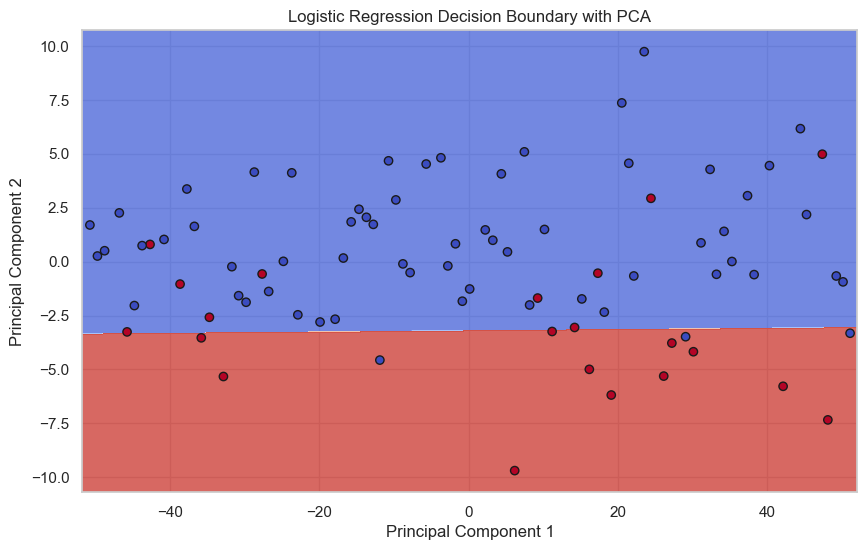

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Check if X_train and X_test are DataFrames and convert to NumPy arrays if necessary
X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_np)
X_test_2d = pca.transform(X_test_np)

# Fit the Logistic Regression model on the reduced data
log_reg = LogisticRegression()
log_reg.fit(X_train_2d, y_train)

# Create a mesh grid for plotting
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the mesh grid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('Logistic Regression Decision Boundary with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### SVM

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM model
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Convert results to DataFrames for better display
conf_matrix_df_svm = pd.DataFrame(conf_matrix_svm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
class_report_df_svm = pd.DataFrame(class_report_svm).transpose()

# Display results
accuracy_svm, conf_matrix_df_svm, class_report_df_svm


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.7619047619047619,
                  Predicted Negative  Predicted Positive
 Actual Negative                  16                   0
 Actual Positive                   5                   0,
               precision    recall  f1-score    support
 0              0.761905  1.000000  0.864865  16.000000
 1              0.000000  0.000000  0.000000   5.000000
 accuracy       0.761905  0.761905  0.761905   0.761905
 macro avg      0.380952  0.500000  0.432432  21.000000
 weighted avg   0.580499  0.761905  0.658945  21.000000)

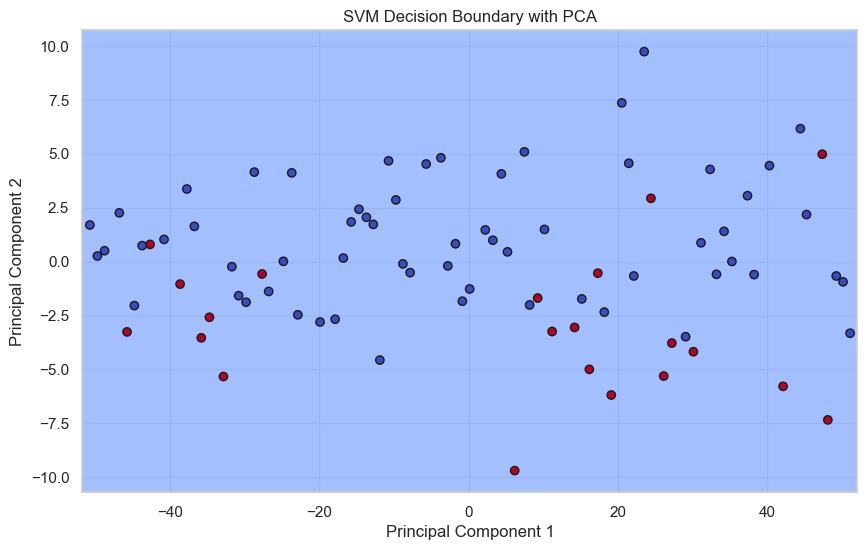

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Check if X_train and X_test are DataFrames and convert to NumPy arrays if necessary
X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_np)
X_test_2d = pca.transform(X_test_np)

# Fit the SVM model on the reduced data
svm_model = SVC()
svm_model.fit(X_train_2d, y_train)

# Create a mesh grid for plotting
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the mesh grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('SVM Decision Boundary with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## DECISION TREE

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# Convert results to DataFrames for better display
conf_matrix_df_dt = pd.DataFrame(conf_matrix_dt, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
class_report_df_dt = pd.DataFrame(class_report_dt).transpose()

# Display results
accuracy_dt, conf_matrix_df_dt, class_report_df_dt


(0.9523809523809523,
                  Predicted Negative  Predicted Positive
 Actual Negative                  16                   0
 Actual Positive                   1                   4,
               precision    recall  f1-score    support
 0              0.941176  1.000000  0.969697  16.000000
 1              1.000000  0.800000  0.888889   5.000000
 accuracy       0.952381  0.952381  0.952381   0.952381
 macro avg      0.970588  0.900000  0.929293  21.000000
 weighted avg   0.955182  0.952381  0.950457  21.000000)

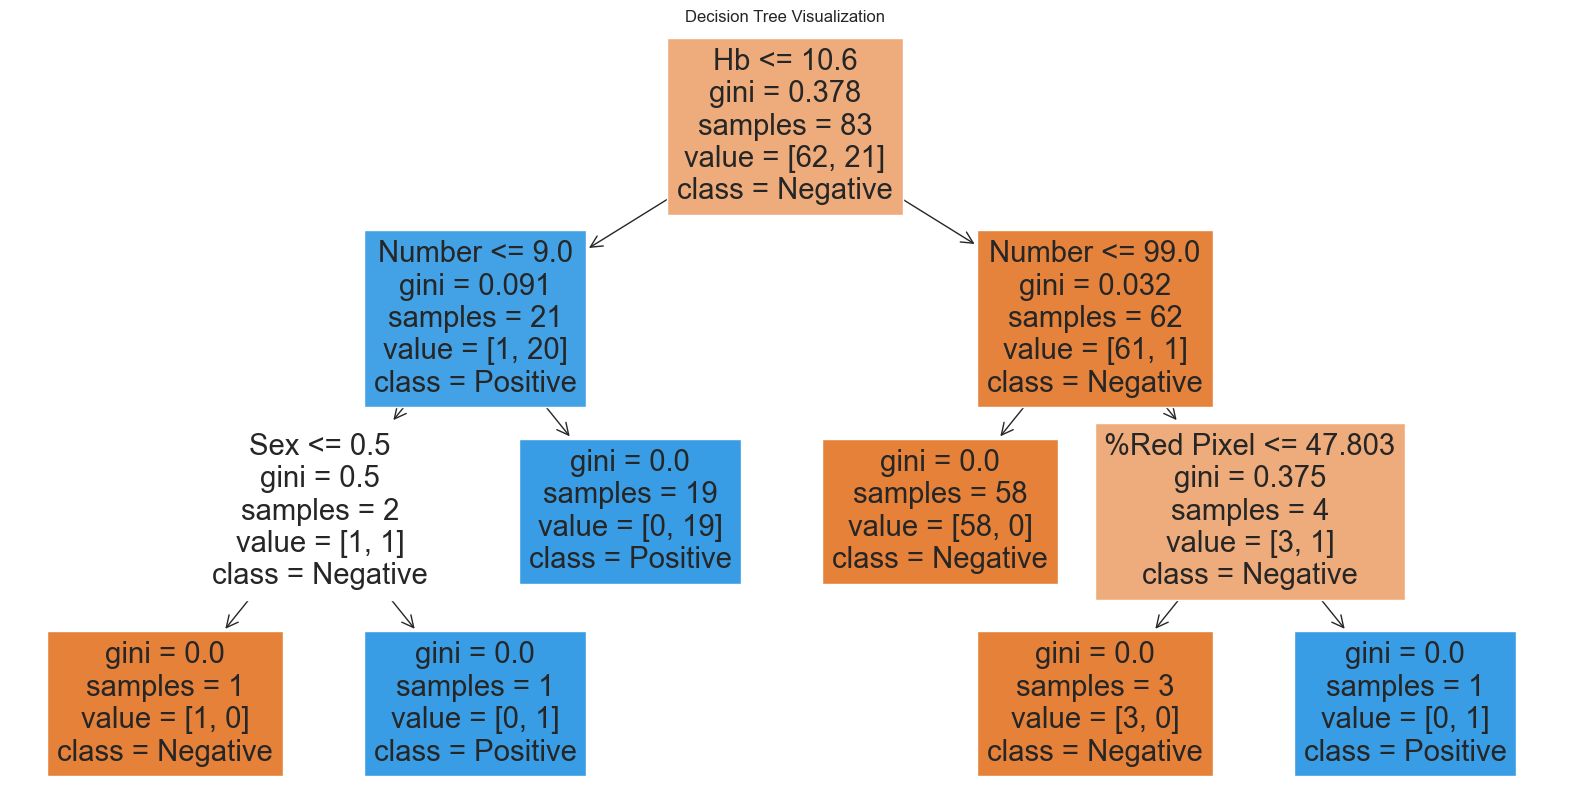

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=['Negative', 'Positive'])
plt.title('Decision Tree Visualization')
plt.show()


#Negative (Class 0): Patients who are not anaemic.
#Positive (Class 1): Patients who are anaemic.


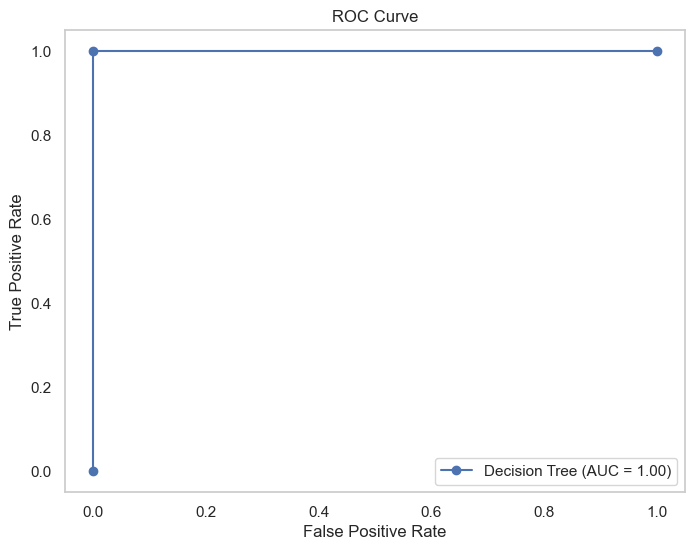

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and fit the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', label=f'Decision Tree (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


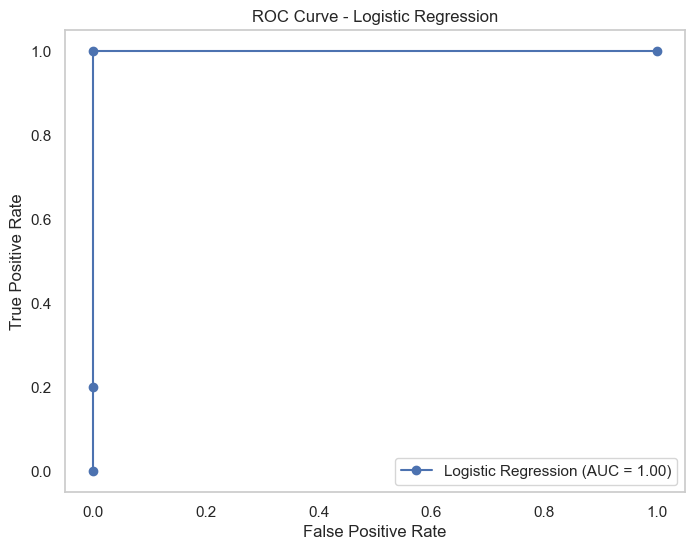

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and fit the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_prob_log_reg)

# Calculate AUC
auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, marker='o', label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='best')
plt.grid()
plt.show()


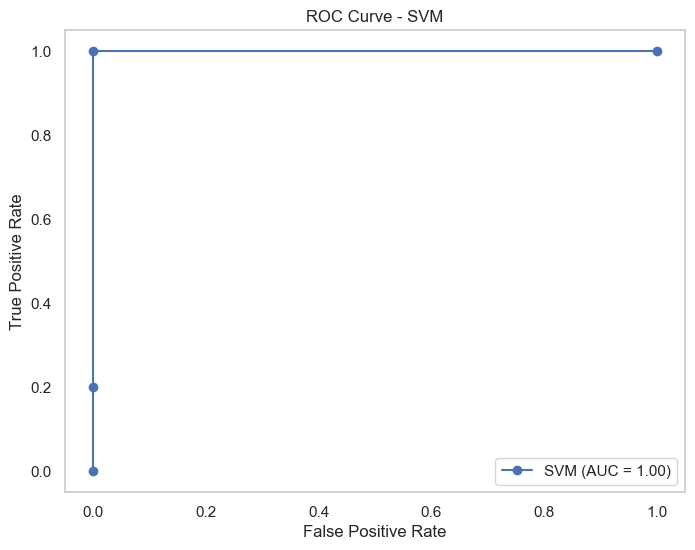

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and fit the SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)

# Calculate AUC
auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, marker='o', label=f'SVM (AUC = {auc_svm:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='best')
plt.grid()
plt.show()
